<a href="https://colab.research.google.com/github/Venkatakkinapalli/Python-Examples/blob/master/DataVisualization_Flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("https://github.com/WillKoehrsen/Data-Analysis/raw/master/univariate_dist/data/formatted_flights.csv", index_col=0)


In [4]:
df.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


In [0]:
delay = df["arr_delay"]

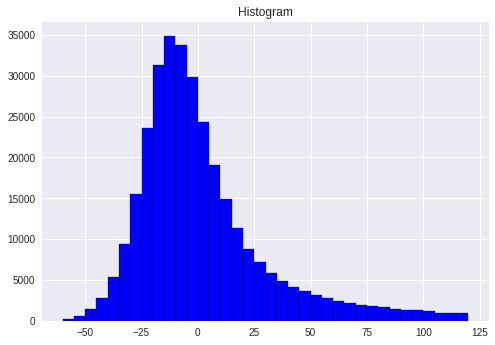

In [6]:
plt.hist(delay, bins=int(180/5), color = 'blue', edgecolor = 'black')
plt.title("Histogram")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


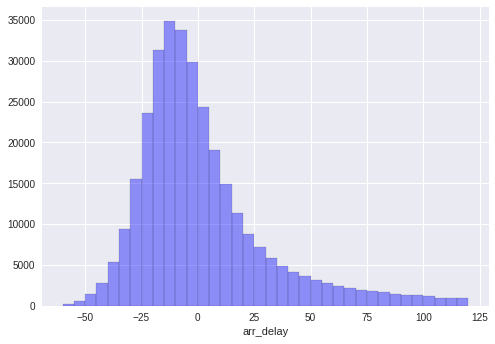

In [7]:
sns.distplot(delay, hist = True, kde = False, bins= int(180/5), color = 'blue',hist_kws = {'edgecolor':'black'})

In [0]:
import numpy as np

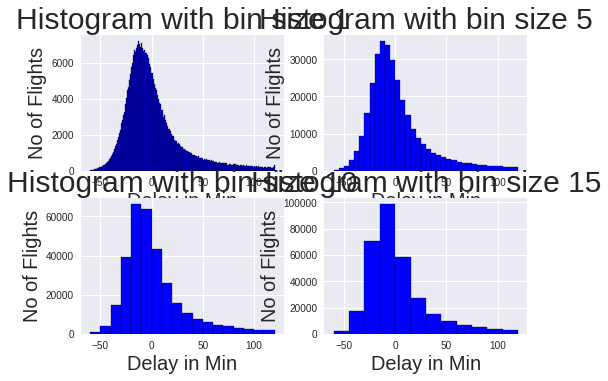

In [9]:

for i, binw in enumerate([1, 5, 10, 15]):
  ax = plt.subplot(2,2,i+1)
  ax.hist(delay,bins=int(180/binw), color = 'blue', edgecolor = 'black',)
  
  ax.set_title("Histogram with bin size %d" % binw, size = 30)
  ax.set_xlabel("Delay in Min", size = 20)
  ax.set_ylabel("No of Flights", size = 20)

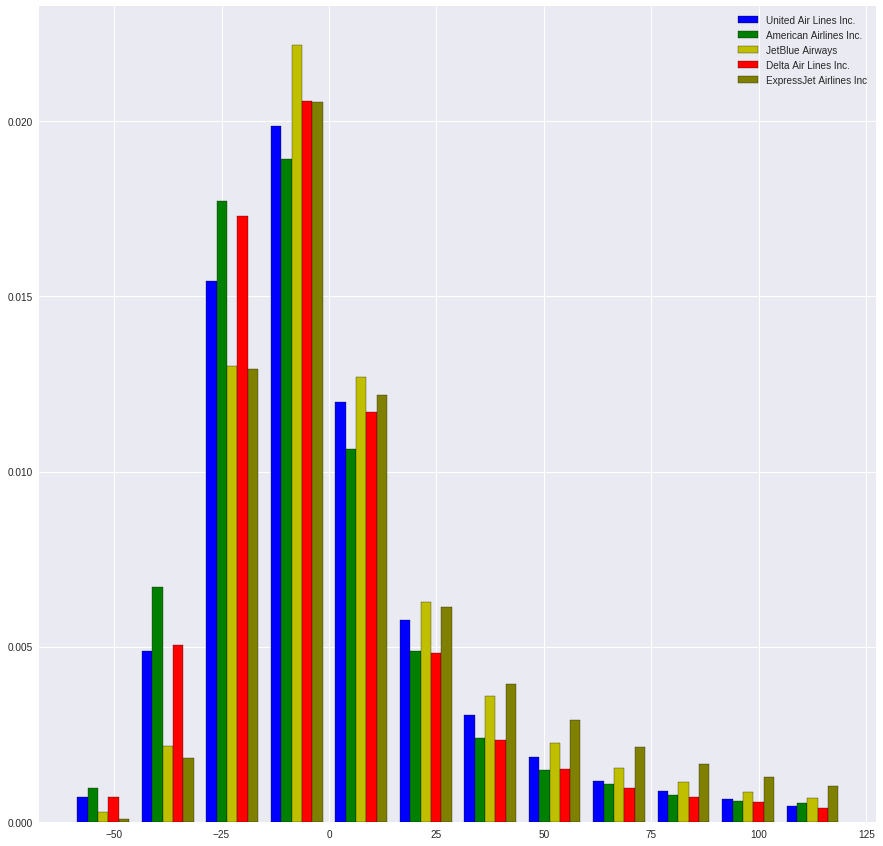

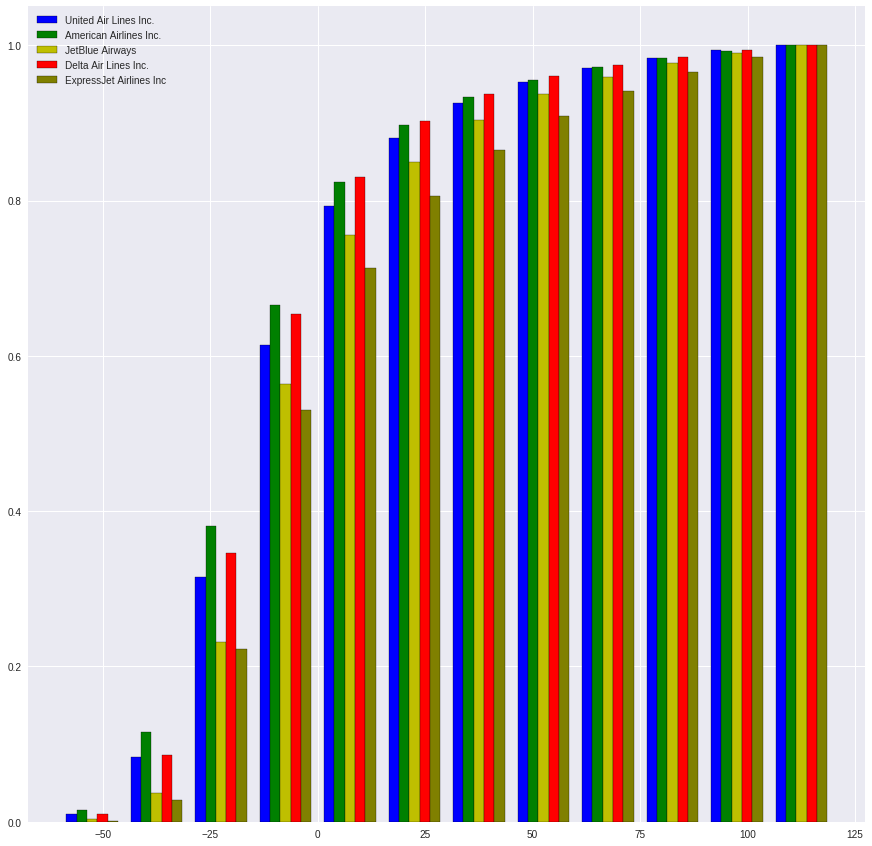

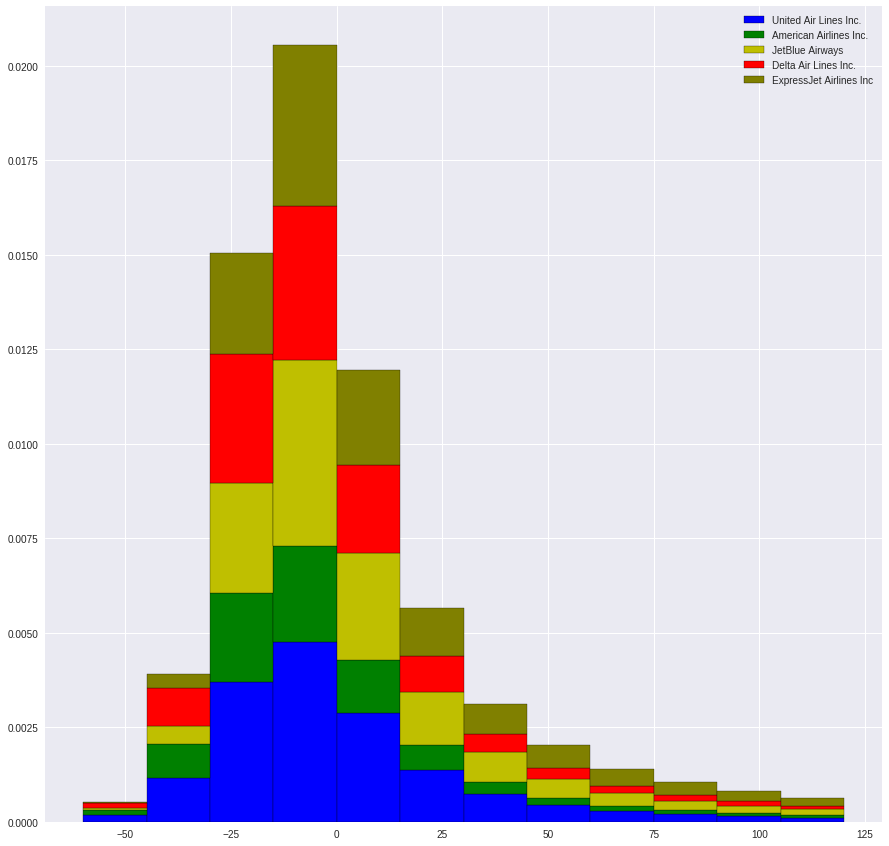

In [10]:
x1 = list(df[df['name']== 'United Air Lines Inc.']['arr_delay'])
x2 = list(df[df['name']== 'American Airlines Inc.']['arr_delay'])
x3 = list(df[df['name']== 'JetBlue Airways']['arr_delay'])
x4 = list(df[df['name']== 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(df[df['name']== 'ExpressJet Airlines Inc.']['arr_delay'])

names = ['United Air Lines Inc.','American Airlines Inc.','JetBlue Airways','Delta Air Lines Inc.','ExpressJet Airlines Inc']

plt.figure(figsize=(15,15))
plt.hist([x1,x2,x3,x4,x5],bins=int(180/15), color = ['b','g','y','r','olive'], edgecolor = 'black', density=True, label = names)
plt.legend()
plt.show()

plt.figure(figsize=(15,15))
plt.hist([x1,x2,x3,x4,x5],bins=int(180/15), color = ['b','g','y','r','olive'], cumulative = True, edgecolor = 'black', density=True, label = names)
plt.legend()
plt.show()


plt.figure(figsize=(15,15))
plt.hist([x1,x2,x3,x4,x5],bins=int(180/15), color = ['b','g','y','r','olive'], stacked = True, edgecolor = 'black', density=True, label = names)
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


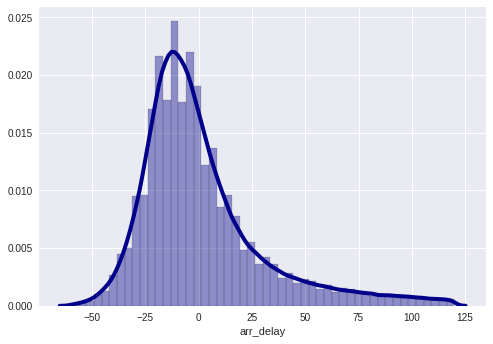

In [11]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['arr_delay'], hist=True, kde=True, 
              color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Text(0, 0.5, 'Density')

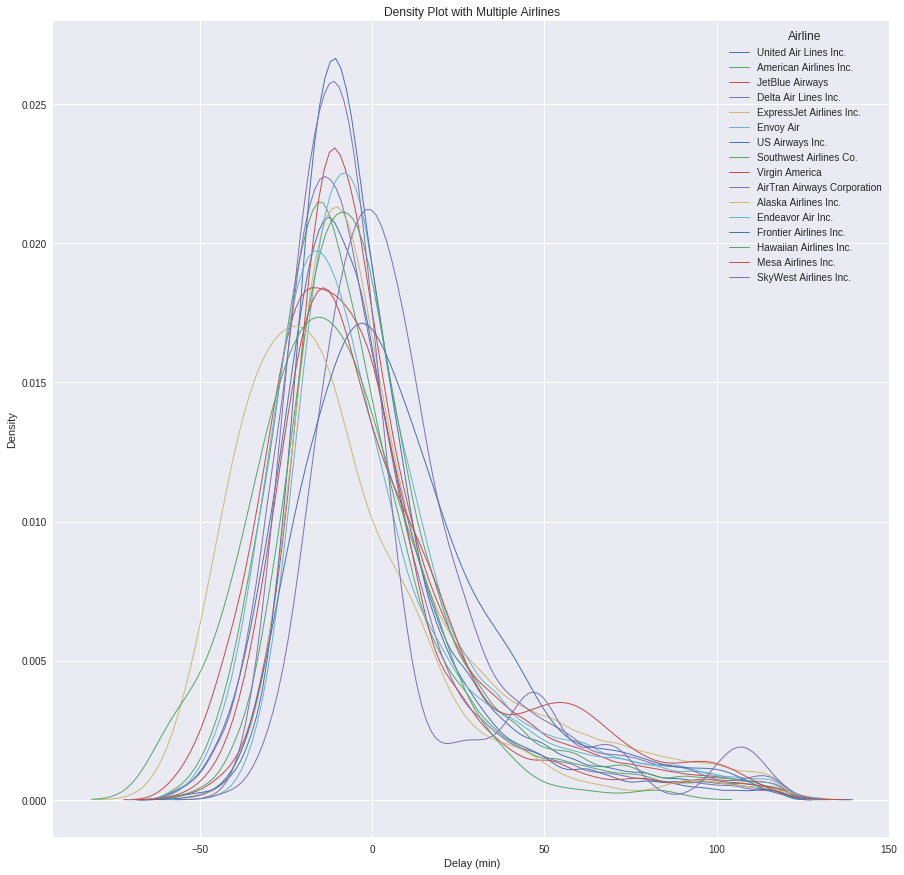

In [12]:
# List of five airlines to plot
airlines = df.name.unique()

#airlines = ['JetBlue Airways']
plt.figure(figsize=(15,15))  
# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = df[df['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = False,
                 kde_kws = {'linewidth': 1},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

In [0]:
def sample(df, n, m):
  samples = []
  for i in range(n):
    samples.append(df.sample(m))
  return samples

In [0]:
samples = sample(df,1000,200)

In [0]:
means = [np.mean(x.arr_delay) for x in samples]


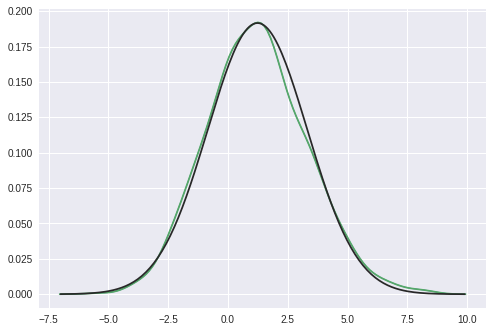

In [52]:
from scipy.stats import norm
sns.distplot(means, hist = False, kde = True, rug = False, kde_kws = {'linewidth': 1})
sns.distplot(means, hist=False, fit=norm)
#sns.distplot(df.arr_delay, kde = True, hist = False)

In [53]:
mean_sample = np.mean(means)
mean_pop = np.mean(df.arr_delay)
std_pop = np.std(df.arr_delay)/np.sqrt(200)
std_sample = np.std(means)


print("mean_sample %f " %mean_sample, " Mean_pop %f" %mean_pop)
print("std_sample %f " %std_sample, " Std_pop/sqrt(sample Size) %f" %std_pop)

mean_sample 1.230345   Mean_pop 1.297143
std_sample 2.082308   Std_pop/sqrt(sample Size) 2.055160
